# Image processing

scipy.ndimage propose de nombreuses actions pour le traitement d'images: convolutions, filtres de Gauss, méthode de mesures, et morphologie.

La morphologie est une technique qui permet de transformer une matrice (et donc une image) par le déplacement d'une structure sur chaque pixel de l'image. Lorsqu'un pixel "blanc" est visité, la structure peut effectuer une opération:

- de dilation: imprime des pixels
- d'érosion : efface des pixels

Cette technique peut-etre utile pour nettoyer une image des artefacts qui peuvent la composer.

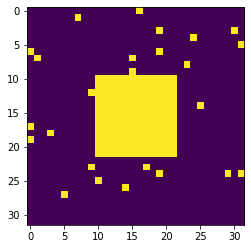

In [4]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

# Création d'une image avec quelques artefacts
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(X)

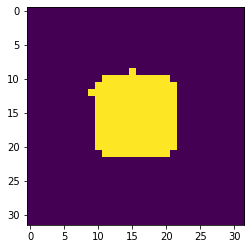

In [5]:
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(X)
plt.imshow(open_X)

(252, 274)

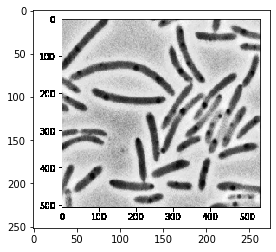

In [12]:
# importer l'image avec pyplot
image = plt.imread('bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

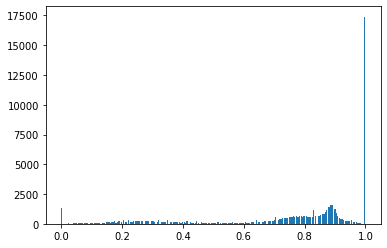

In [13]:
# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

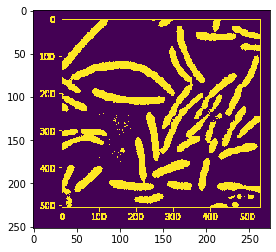

In [14]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.imshow(image)

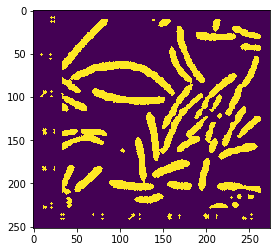

In [15]:
# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

In [16]:
# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

il y a 71 groupes


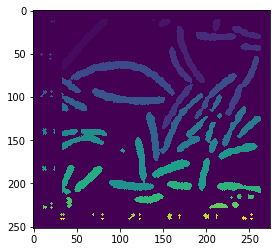

In [17]:
# Visualisation de l'image étiquetée
plt.imshow(label_image)

In [18]:
# Mesure de la taille de chaque groupes de label_images (fait la somme des pixels)
sizes = ndimage.sum(open_image, label_image, range(n_labels))

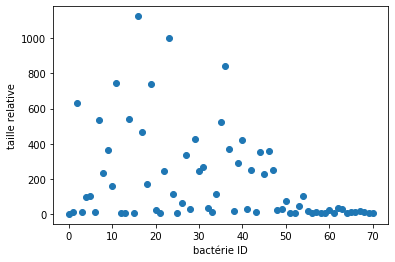

In [19]:
# Visualisation des résultats
plt.scatter(range(n_labels), sizes)
plt.xlabel('bactérie ID')
plt.ylabel('taille relative')
plt.show()